# EuroSAT Classification — Train classifier

This notebook trains a **ResNet18 model** or **Simple CNN** on the **EuroSAT Dataset** using the dataloader and training functions from *./src*.

### 1. Setup environment and imports

In [1]:
import sys, os
if not hasattr(sys, "frozen"):
    os.environ["PYDEVD_DISABLE_FILE_VALIDATION"] = "1"
import torch
from torchvision import models
import torch.nn as nn

sys.path.append(os.path.abspath("..")) 
from src.training.train import train_model
from src.training.evaluate import evaluate_model, plot_confusion_matrix



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model_name = "resnet18" # simplecnn
data_dir = '../data/raw'
checkpoint_dir = '../experiments/checkpoints'

Using device: cpu


In [2]:
epochs = 100
early_stopping = 10

if model_name == "simplecnn":
        checkpoint_path = "../experiments/checkpoints/simplecnn_best.pth"
elif model_name == "resnet18":
        checkpoint_path = "../experiments/checkpoints/resnet18_best.pth"
        


### 2. Train baseline SimpleCNN / ResNet18 model

In [13]:
model, classes = train_model(
    data_dir=data_dir,
    batch_size=64,
    epochs=epochs,
    lr=1e-4,
    model_name=model_name, 
    output_dir=checkpoint_dir,
    early_stopping_patience=early_stopping,
)

print(f"\nTraining completed. Number of classes: {len(classes)}")

🔧 Using device: cpu


KeyboardInterrupt: 

### 3. Evaluate final metrics on Test Dataset

🔧 Using device: cpu

🧪 Evaluating model on test set...



🎯 Test Accuracy: 98.98%
Test Loss: 0.0522

Classification metrics per category:

              precision    recall  f1-score   support

      Forest     0.9910    0.9866    0.9888       448
 Residential     0.9915    1.0000    0.9957       464
       River     0.9861    0.9807    0.9834       363

    accuracy                         0.9898      1275
   macro avg     0.9895    0.9891    0.9893      1275
weighted avg     0.9898    0.9898    0.9898      1275



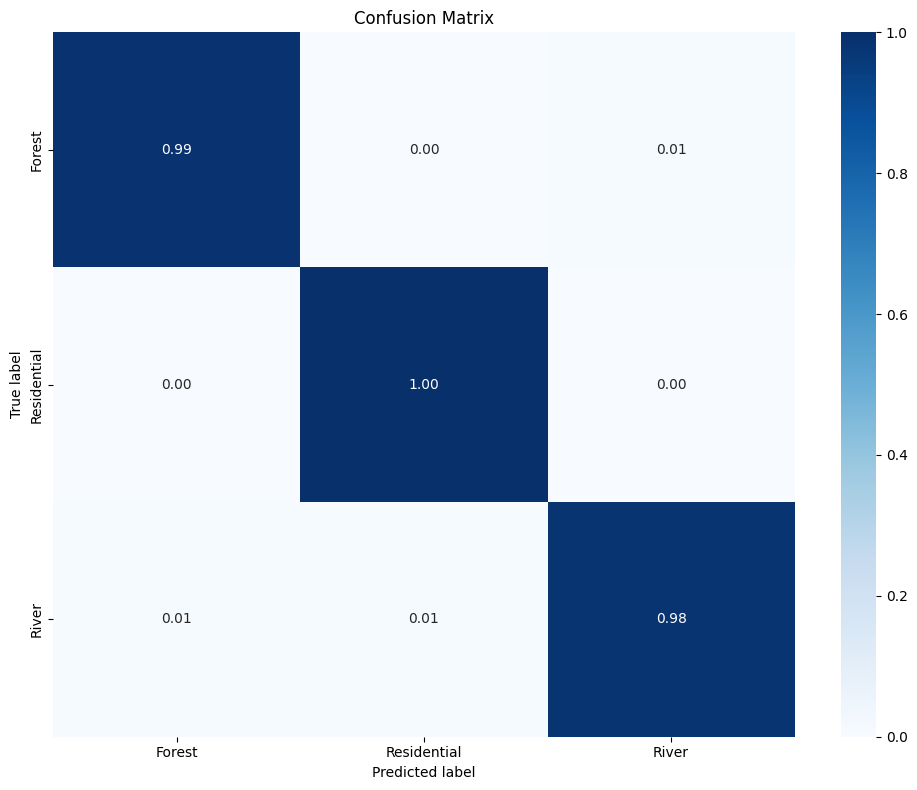

In [3]:
metrics = evaluate_model(
    model_path=checkpoint_path,
    data_dir=data_dir,
    batch_size=64,
    model_name=model_name,
    device=device
)


- Metrics

In [ ]:
print(f"Test Accuracy: {metrics['accuracy']*100:.2f}%")
print(f"Test Loss: {metrics['loss']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"F1-score: {metrics['f1']:.4f}")

print("\nClassification metrics per category:\n\n", metrics["classification_report"])


- Confusion Matrix

In [ ]:
plot_confusion_matrix(metrics["confusion_matrix"], metrics["class_names"])